# Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
true = pd.read_csv('../raw_data/True.csv')

fake = pd.read_csv('../raw_data/Fake.csv')

In [3]:
true.head()
#fake['text'][0]
#fake.isna().sum()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# Analisys of data

## Count of Twitter references

In [4]:
#from nltk.tokenize import word_tokenize
#test = fake['text'][0]
#print(word_tokenize(test))

In [5]:
#test.count('@')

In [6]:
#fake['tokenized_text'] = fake.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
#fake.head(2)

In [7]:
import re
# count twitter references in fake['text']
twitter_at = re.compile(r'@([A-Za-z0-9_]+)')
count = 0
for text in fake['text']:
     count += len(re.findall(twitter_at, text))
count

27886

In [8]:
# all_texts_tokenized = []
# for text in fake['text']:
#     all_texts_tokenized.append(word_tokenize(text))
# twit = 0
# for i in range(len(all_texts_tokenized)):
#     for token in all_texts_tokenized[i]:
#         if token == '@':
#             twit += 1
# twit

In [9]:
# count twitter references in true['text']
twitter_at = re.compile(r'@([A-Za-z0-9_]+)')
count = 0
for text in true['text']:
     count += len(re.findall(twitter_at, text))
count

803

## Ploting subject true vs fake

<AxesSubplot:>

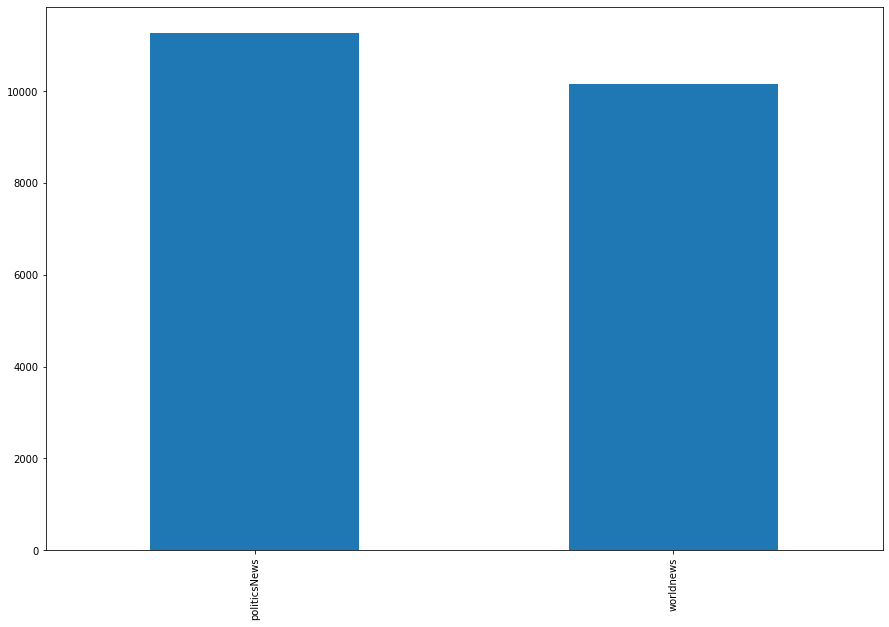

In [10]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,10
true.subject.value_counts().plot(kind="bar")

<AxesSubplot:>

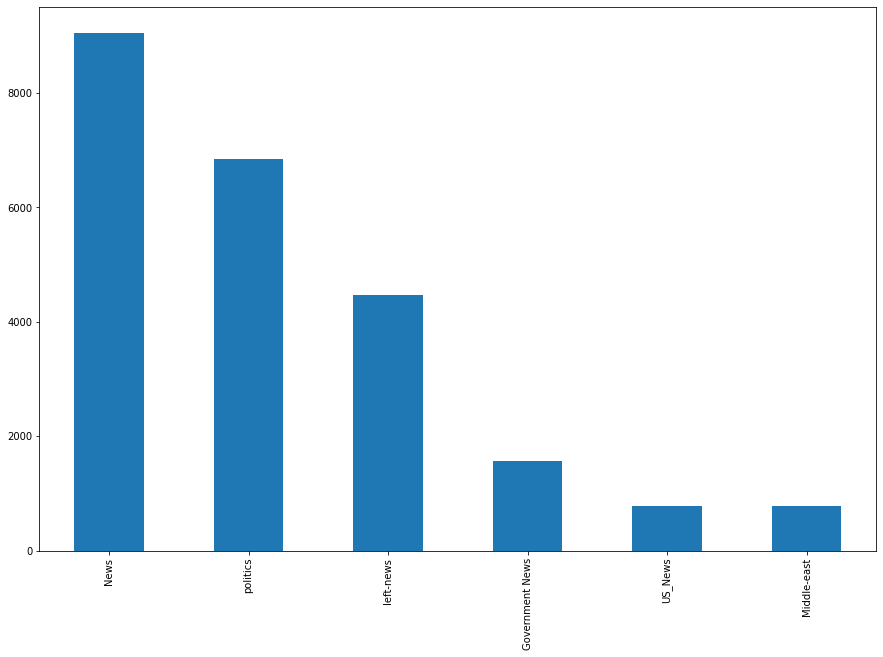

In [11]:
rcParams['figure.figsize'] = 15,10
fake.subject.value_counts().plot(kind="bar")

## Merge datasets

In [12]:
true.drop(columns = ['subject','date'], inplace = True)

In [13]:
fake.drop(columns = ['subject','date'], inplace = True)

In [14]:
true['score'] = 1
fake['score'] = 0

In [15]:
data = pd.concat([true,fake],ignore_index=True)

In [16]:
data_title_text = data.copy()

In [17]:
data_title_text['title_text'] = data_title_text['title'] + data_title_text['text']

In [18]:
data_title_text = data_title_text[['title_text', 'score']]

## cleaning

In [19]:
#lower case
data['text'] = data['text'].str.lower()

data['title'] = data['title'].str.lower()

In [20]:
#get rid of numbers
def no_num(text):
    text= ''.join(word for word in text if not word.isdigit())
    return text

data['text']=data['text'].apply(no_num)

In [21]:
#data['text']=data['text'].apply(clean)

In [22]:
#data['text']

In [23]:
#import string 
#def remove_punctuations(text):
      #return text.translate(None,string.punctuation)

data['text'] = data['text'].str.replace('[^\w\s]','')


In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [25]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [26]:
data_common_true=true.copy()
data_common_true.drop(columns = ['score'], inplace = True)
data_common_true['title_text'] = data_common_true['title'] + data_common_true['text']
data_common_true.drop(columns = ['title','text'], inplace = True)

data_common_fake=fake.copy()
data_common_fake.drop(columns = ['score'], inplace = True)
data_common_fake['title_text'] = data_common_fake['title'] + data_common_fake['text']
data_common_fake.drop(columns = ['title','text'], inplace = True)

# lower case
data_common_true['title_text'] = data_common_true['title_text'].str.lower()
data_common_fake['title_text'] = data_common_fake['title_text'].str.lower()
# get rid of numbers
data_common_true['title_text'].apply(no_num)
data_common_fake['title_text'].apply(no_num)
# no punctuation
data_common_true['title_text'] = data_common_true['title_text'].str.replace('[^\w\s]','')
data_common_fake['title_text'] = data_common_fake['title_text'].str.replace('[^\w\s]','')
#stop words
data_common_true['title_text'] = data_common_true['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data_common_fake['title_text'] = data_common_fake['title_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [36]:
# from nltk.tokenize import word_tokenize

# tokens = []
# for text in data['text']:
#     tokens.append(word_tokenize(text))


In [39]:
# remove 'reuters'
stop_words =['reuters']
pat = '|'.join(r"\b{}\b".format(x) for x in stop_words)
data['text'] = data['text'].str.replace(pat, '')

## some code I won't use

In [ ]:
# #tokenize each row
# data_common_true['title_text_token'] = data_title_text.apply(lambda row: nltk.word_tokenize(row['title_text']), axis=1)
# data_common_fake['title_text_token'] = data_title_text.apply(lambda row: nltk.word_tokenize(row['title_text']), axis=1)


In [ ]:
# textify_true = data_common_true['title_text_token'].astype(str).values.tolist()
# textify_fake = data_common_fake['title_text_token'].astype(str).values.tolist()

In [ ]:
# wordcount_true = {}
# for word in textify_true:

#     if word not in wordcount_true:
#         wordcount_true[word] = 1
#     else:
#         wordcount_true[word] += 1


In [ ]:
# # Print most common word
# n_print = int(input("How many most common words to print: "))
# print("\nOK. The {} most common words are as follows\n".format(n_print))
# word_counter = collections.Counter(wordcount_true)
# for word, count in word_counter.most_common(n_print):
#     print(word, ": ", count)


In [ ]:
# lst_true = word_counter.most_common(n_print)
# df_true = pd.DataFrame(lst_true, columns = ['Word', 'Count'])
# df_true.plot.bar(x='Word',y='Count')

In [ ]:
# wordcount_fake = {}
# for word in textify_fake:

#     if word not in wordcount_fake:
#         wordcount_fake[word] = 1
#     else:
#         wordcount_fake[word] += 1



In [ ]:
# # Print most common word
# n_print = int(input("How many most common words to print: "))
# print("\nOK. The {} most common words are as follows\n".format(n_print))
# word_counter = collections.Counter(wordcount_fake)
# for word, count in word_counter.most_common(n_print):
#     print(word, ": ", count)

In [ ]:
# lst_fake = word_counter.most_common(n_print)
# df_fake = pd.DataFrame(lst_fake, columns = ['Word', 'Count'])
# df_fake.plot.bar(x='Word',y='Count')

## Plotting of common words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_words(text, n=None):
    vec = CountVectorizer().fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

list_fake = get_top_words(data_common_fake['title_text'], 25)
list_true = get_top_words(data_common_true['title_text'], 25)


In [ ]:
import plotly.graph_objects as go
new_list_words = [ seq[0] for seq in list_fake ]
new_list_values = [ seq[1] for seq in list_fake ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values, 
                         x=new_list_words,
))

fig.show()

In [ ]:
new_list_words = [ seq[0] for seq in list_true ]
new_list_values = [ seq[1] for seq in list_true ]

fig = go.Figure()
fig.add_trace(go.Bar(y=new_list_values, 
                         x=new_list_words,
))

fig.show()

## Mispelling

In [ ]:
# from nltk.tokenize import word_tokenize
# test = data['text'][0]
# tokens = word_tokenize(test)
# tokens

In [ ]:
# from tqdm import tqdm
# import enchant


# def wrong_words(text):
#     d = enchant.DictWithPWL("en_US", "vocab.txt")
#     tokens = set()
#     for token in tqdm(text):
#         if not d.check(token) and not d.check(token.capitalize()):
#             tokens.add(token)
#     return tokens

# def get_top_n_words(text, n=None, vocabulary=None):
#     vec = CountVectorizer(vocabulary=vocabulary).fit(text)
#     bag_of_words = vec.transform(text)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]


# wrong = wrong_words(unique_tokens_true)
# wrong_true = get_top_n_words(unique_tokens_true, n=100, vocabulary=wrong)
# wrong = wrong_words(unique_tokens_fake)
# wrong_fake = get_top_n_words(unique_tokens_fake, n=100, vocabulary=wrong)

# new_list_words = [ seq[0] for seq in wrong_true ]
# new_list_values = [ seq[1] for seq in wrong_true ]

# fig = go.Figure()
# fig.add_trace(go.Bar(y=new_list_values, 
#                      x=new_list_words, 
# ))

# fig.show()

## Tokenization

In [40]:
# def tokenizeandstopwords(text):
#     tokens = nltk.word_tokenize(text)
#     return tokens

In [45]:
# data['text_tokenized'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


In [49]:
# from gensim.models import Word2Vec
# word2vec = Word2Vec(sentences=sentences_train)

In [51]:
data_concat = data.copy()
data_concat['title_text'] = data['title'] + data['text']
data_concat.drop(columns = ['title', 'text'], inplace = True)
data_concat = data_concat[['title_text', 'score']]
data_concat.tail()

,title_text,score
44893,mcpain: john mccain furious iran treated us sa...,0
44894,justice? yahoo settles e-mail privacy class-ac...,0
44895,sunnistan: us allied ‘safe zone’ plan take ter...,0
44896,blow $700 million: al jazeera america finally ...,0
44897,10 u.s. navy sailors held iranian military – s...,0


In [68]:
import gensim
from gensim.models import Word2Vec

Word2Vec = gensim.models.Word2Vec(data_concat, size=100, window=5, min_count=1)

In [71]:
def embed_sentence(Word2Vec, sentence):
    sentence_vec = []
    for word in sentence:
        if word in Word2Vec.wv.vocab.keys():
            sentence_vec.append(Word2Vec.wv[word])
    return np.array(sentence_vec)
embedded_sentence = embed_sentence(Word2Vec, data_concat['title_text'])

In [72]:
embedded_sentence

array([], dtype=float64)